In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

way = r"C:\Users\Ilies\Desktop\Data\SDA (N.MOUMMOU)\Projet\credit_card_transactions.csv"
data = pd.read_csv(way)
df = pd.DataFrame(data)

# display(df)

In [2]:
print(f"Données : {df.shape[0]} lignes et {df.shape[1]} colonnes \n\n")
print(df.info())

Données : 1296675 lignes et 24 colonnes 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    129667

In [3]:
# Convertir la colonne des dates en datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extraire l'année
df['year'] = df['trans_date_trans_time'].dt.year
# Extraire le mois
df['month'] = df['trans_date_trans_time'].dt.month
# Extraire le jour
df['day'] = df['trans_date_trans_time'].dt.day
# Extraire le jour de la semaine
df['dayname'] = df['trans_date_trans_time'].dt.day_name()
# Extraire l'heure
df['hour'] = df['trans_date_trans_time'].dt.hour

# Extraire l'année et le mois (au format AAAA-MM)
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

In [4]:
# colonne de valeurs manquantes
data_missing = df.isnull().sum()
print("Colonnes avec des valeurs manquantes :")
print(data_missing[data_missing > 0])

Colonnes avec des valeurs manquantes :
merch_zipcode    195973
dtype: int64


In [5]:
#Informations liées à la colonne amount 

#simplifier la notation
pd.options.display.float_format = '{:.2f}'.format
print(df['amt'].describe())

count   1296675.00
mean         70.35
std         160.32
min           1.00
25%           9.65
50%          47.52
75%          83.14
max       28948.90
Name: amt, dtype: float64


In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
count = df['trans_date_trans_time'].dt.year.value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['gender'].value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['category'].value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['merchant'].value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['city'].value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['state'].value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['job'].value_counts()
print("Informations liées à la colonne", count,"\n")

df['dob'] = pd.to_datetime(df['dob'])
count = df['dob'].dt.year.value_counts()
print("Informations liées à la colonne", count,"\n")

count = df['is_fraud'].value_counts()
print("Informations liées à la colonne", count,"\n")

Informations liées à la colonne trans_date_trans_time
2019    924850
2020    371825
Name: count, dtype: int64 

Informations liées à la colonne gender
F    709863
M    586812
Name: count, dtype: int64 

Informations liées à la colonne category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64 

Informations liées à la colonne merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King    

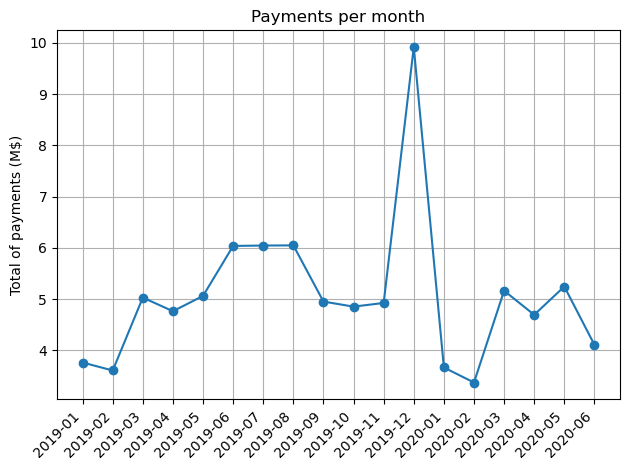

In [7]:
# Nombre de paiements par mois 


df['amt_M'] = df['amt'] / 1000000

# Regrouper et sommer par année et par montant
amt_sum_by_year = df.groupby(['year'])['amt_M'].sum()
amt_sum_by_month = df.groupby(['year_month'])['amt_M'].sum()

# Afficher les résultats
# print("Montants totaux par année :\n\n", amt_sum_by_year, "\n")
# print("Montants totaux par mois :\n\n", amt_sum_by_month, "\n")


# Tracer les données
plt.plot(amt_sum_by_month.index.astype(str), amt_sum_by_month.values, marker='o', linestyle='-')

# Ajouter des titres et des labels
plt.ylabel('Total of payments (M$)')
plt.title('Payments per month')
plt.xticks(rotation=45, ha='right')  # Améliore la lisibilité des mois
plt.grid(True)
plt.tight_layout()
plt.show()



Observations : 
-18 mois de données
-max en décembre
-min en février 

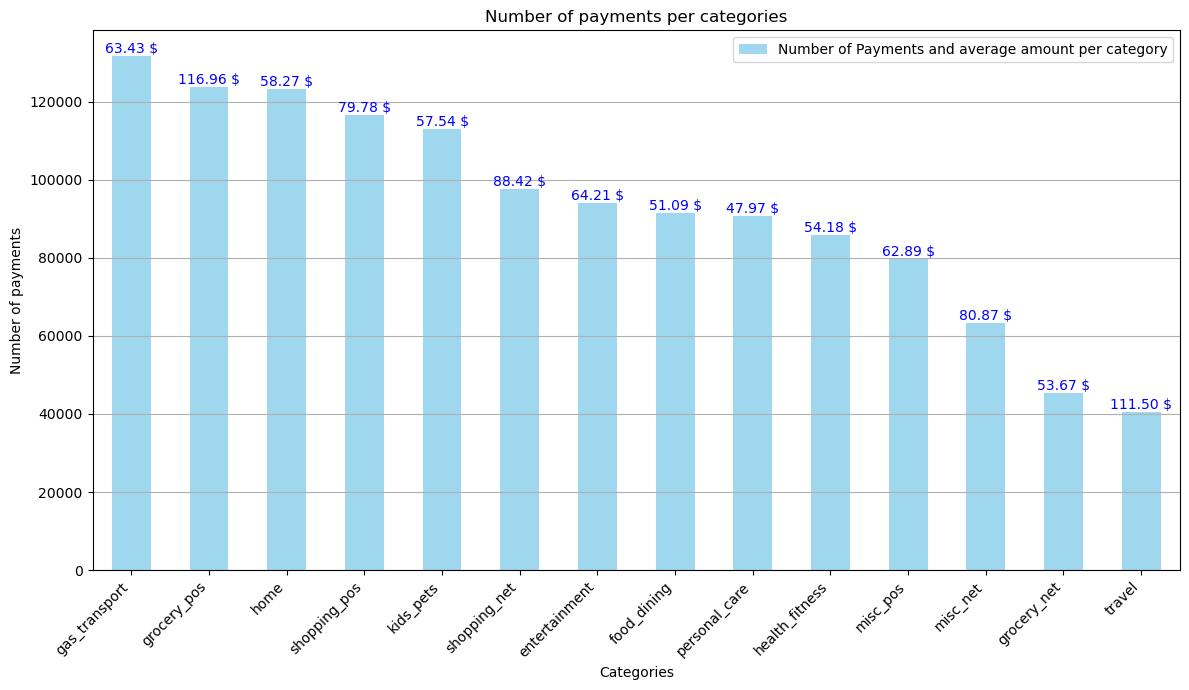

In [8]:
# Nombre de paiement en fonction de la CATEGORY

# Calcul de la somme et tri par ordre décroissant
category_sum = df.groupby('category').size().sort_values(ascending=False)

# Calculer le paiement moyen par catégorie
avg_payment_per_category = df.groupby('category')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_category,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé des paiements par catégorie
category_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)

# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, category in enumerate(category_sum.index):
    ax1.text(i, category_sum[category], f'{avg_payment_per_category[category]:.2f} $', 
             ha='center', va='bottom', color='blue', fontsize=10)
    
# Configuration du graphique
plt.xlabel('Categories')
plt.ylabel('Number of payments')
plt.title('Number of payments per categories')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and average amount per category'], loc='upper right')


plt.tight_layout()
plt.show()

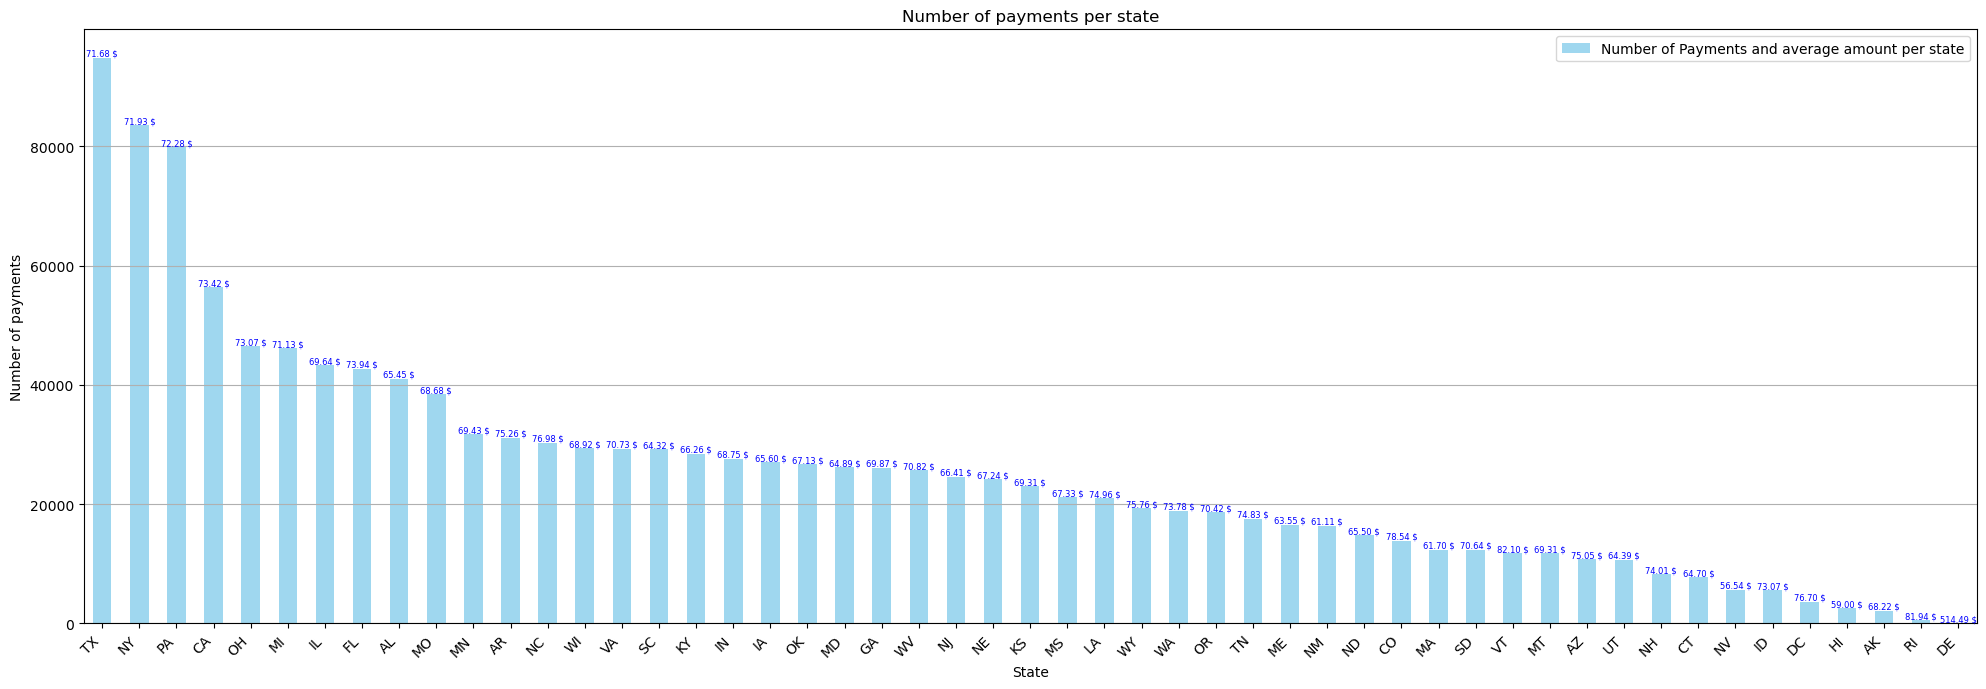

In [9]:
# Nombre de paiement en fonction du STATE

# Calcul de la somme et tri par ordre décroissant
state_sum = df.groupby('state').size().sort_values(ascending=False)


# Calculer le paiement moyen par state
avg_payment_per_state = df.groupby('state')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_state,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(20, 7))

# Tracé des paiements par catégorie
state_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)

# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, state in enumerate(state_sum.index):
    ax1.text(i, state_sum[state], f'{avg_payment_per_state[state]:.2f} $', 
             ha='center', va='bottom', color='blue', fontsize=6)
    
# Configuration du graphique
plt.xlabel('State')
plt.ylabel('Number of payments')
plt.title('Number of payments per state')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and average amount per state'], loc='upper right')


plt.tight_layout()
plt.show()

In [10]:
# Nombre de paiement en fonction du JOB

# Grouper par mois, et compter les occurrences
job_sum_by_year = df.groupby(['year', 'job']).size().unstack(fill_value=0)
job_sum_by_month = df.groupby(['year_month', 'job']).size().unstack(fill_value=0)

# Afficher le résultat
# print("Nombre de paiements en fonction du JOB :\n\n", job_sum_by_year,"\n")
# print(job_sum_by_month)

In [11]:
import json
# Fonction pour trouver l'emmeteur de la carte bancaire



# Charger le JSON
with open(r"C:\Users\Ilies\Desktop\Data\SDA (N.MOUMMOU)\Projet\iin_ranges.json", "r") as file:
    iin_data = json.load(file)


def get_issuer(card_number):
    for network, ranges in iin_data["networks"].items():
        for iin_range in ranges:
            if "-" in iin_range:
                start, end = map(int, iin_range.split("-"))
                if start <= int(card_number[:len(str(start))]) <= end:
                    return network
            else:
                if card_number.startswith(iin_range):
                    return network
    return "Unknown Issuer Network"

# # # Entrée utilisateur
# card_number = input("Entrez les 6 premiers chiffres de la carte : ").strip()

# # Vérification et affichage
# issuer = get_issuer(card_number)
# print(f"Le réseau émetteur est : {issuer}")

In [12]:
# Convertir les nombres en chaînes sans notation scientifique
df['cc_num'] = df['cc_num'].apply(lambda x: f"{int(x):.0f}")

# Récupérer les 4 premiers chiffres
first_6_digits= df['cc_num'].str[:6]

# Afficher le DataFrame
print(first_6_digits)


0          270318
1          630423
2          388594
3          353409
4          375534
            ...  
1296670    302635
1296671    601114
1296672    351486
1296673    272001
1296674    429290
Name: cc_num, Length: 1296675, dtype: object


In [13]:
df['iin'] = first_6_digits.apply(get_issuer)

In [14]:
# Nombre de paiement frauduleux
# Grouper par mois, et compter les occurrences
fraud_sum_by_year = df.groupby(['year', 'is_fraud']).size().unstack(fill_value=0)
fraud_sum_by_month = df.groupby(['year_month', 'is_fraud']).size().unstack(fill_value=0)

# Afficher le résultat
print("Nombre de paiements frauduleux :\n\n", fraud_sum_by_year,"\n")
print(fraud_sum_by_month)

Nombre de paiements frauduleux :

 is_fraud       0     1
year                  
2019      919630  5220
2020      369539  2286 

is_fraud         0    1
year_month             
2019-01      52019  506
2019-02      49349  517
2019-03      70445  494
2019-04      67702  376
2019-05      72124  408
2019-06      85710  354
2019-07      86265  331
2019-08      86977  382
2019-09      70234  418
2019-10      68304  454
2019-11      70033  388
2019-12     140468  592
2020-01      51859  343
2020-02      47455  336
2020-03      72406  444
2020-04      66590  302
2020-05      73816  527
2020-06      57413  334


les paiements frauduleux sont à l'image des paiements non frauduleux 

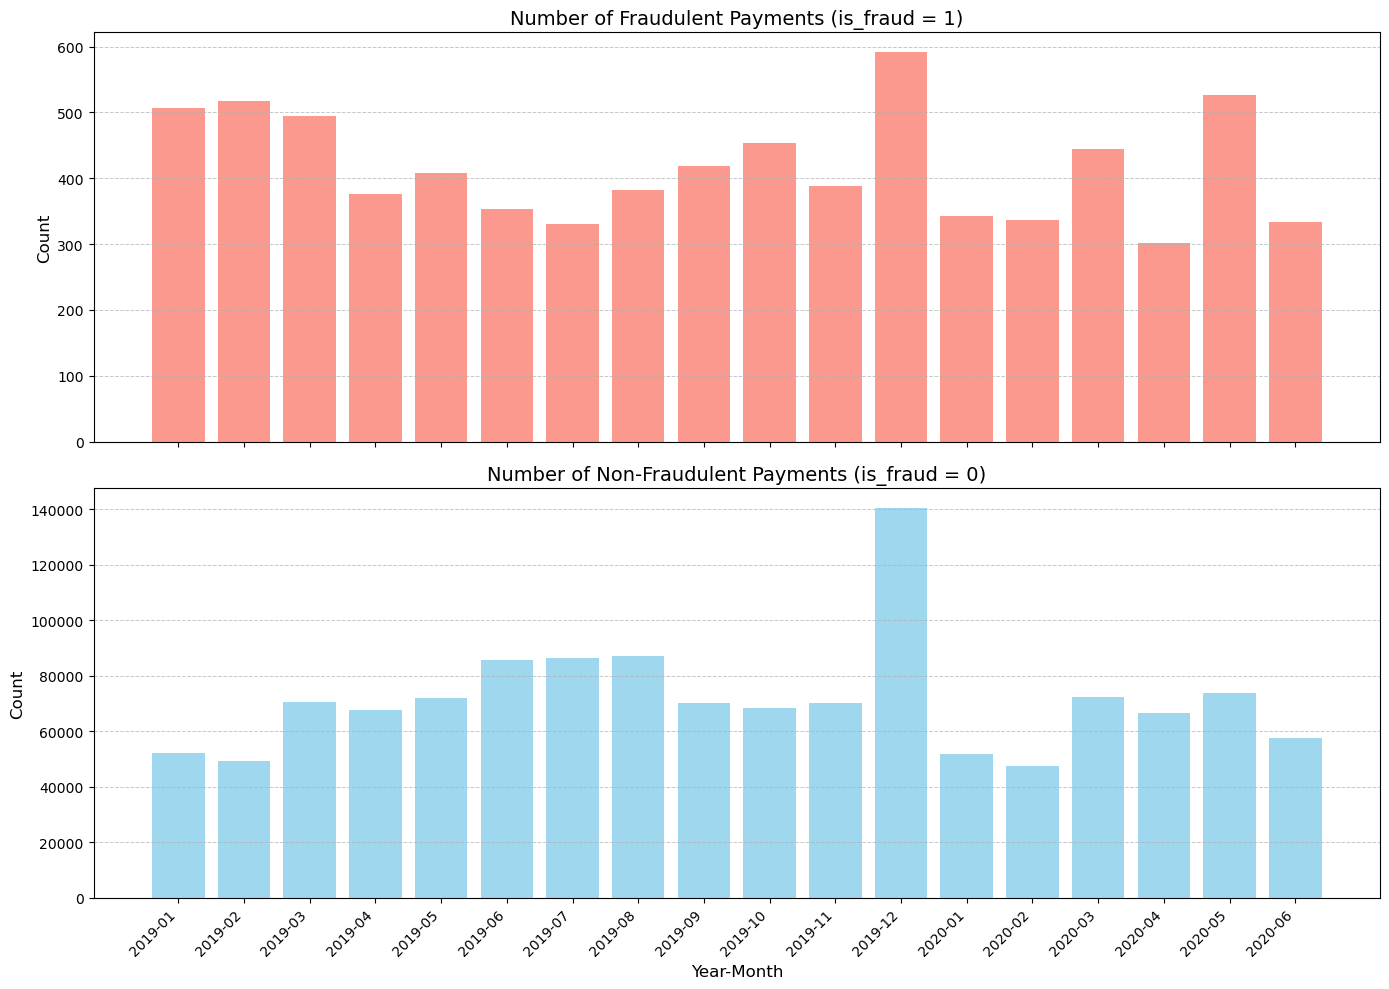

In [15]:


# Assurez-vous que 'year_month' est présent dans le DataFrame
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M').astype(str)

# Grouper par year_month et is_fraud
fraud_counts = df[df['is_fraud'] == 1].groupby('year_month').size()
non_fraud_counts = df[df['is_fraud'] == 0].groupby('year_month').size()

# Remplir les périodes manquantes avec 0 pour assurer un alignement correct
all_months = df['year_month'].sort_values().unique()
fraud_counts = fraud_counts.reindex(all_months, fill_value=0)
non_fraud_counts = non_fraud_counts.reindex(all_months, fill_value=0)

# Création des subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Graphique pour is_fraud = 1
ax1.bar(fraud_counts.index, fraud_counts.values, color='salmon', alpha=0.8)
ax1.set_title('Number of Fraudulent Payments (is_fraud = 1)', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Graphique pour is_fraud = 0
ax2.bar(non_fraud_counts.index, non_fraud_counts.values, color='skyblue', alpha=0.8)
ax2.set_title('Number of Non-Fraudulent Payments (is_fraud = 0)', fontsize=14)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xlabel('Year-Month', fontsize=12)
ax2.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Ajustement des ticks
plt.xticks(rotation=45, ha='right')

# Ajustement global
plt.tight_layout()
plt.show()


In [16]:
isfraud1_df = df[df['is_fraud'] == 1][['iin', 'trans_date_trans_time']]

# print(isfraud1_df)

In [17]:
# unknown_count = (isfraud1_df['iin'] == 'Unknown Issuer Network').sum()

# print(f"Nombre de 'Unknown Issuer Network' : {unknown_count} \n\n")

# unknown_fraud = df[(df['iin'] == 'Unknown Issuer Network') & (df['is_fraud'] == 1)][['cc_num', 'trans_date_trans_time']]

# print(unknown_fraud)


In [18]:
# print("Paiements frauduleux par liste d'émetteur")
isfraud1_df['iin'].value_counts()


iin
Visa                        2432
JCB                         1690
Discover Card                650
American Express             626
Diners Club Intl             603
Mastercard                   569
Maestro                      341
UATP                         254
GPN                          134
Laser                         69
Diners Club USA & Canada      53
Maestro UK                    41
InstaPayment                  35
Switch                         9
Name: count, dtype: int64

Total des paiements par liste d'émetteur
iin
Visa                        418816
JCB                         288558
Diners Club Intl            125985
American Express            123834
Discover Card               105436
Mastercard                   88287
Maestro                      47362
UATP                         39893
GPN                          21524
Laser                        17883
Diners Club USA & Canada      8278
InstaPayment                  5641
Maestro UK                    5169
Switch                           9
Name: count, dtype: int64


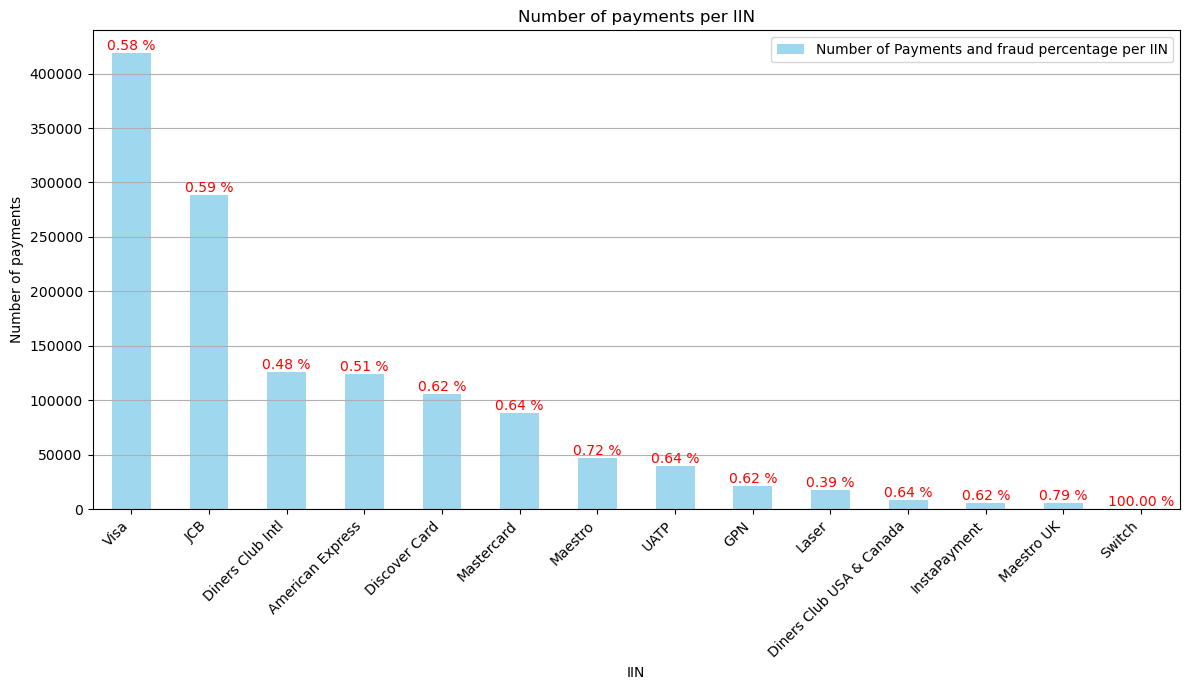

In [19]:
print("Total des paiements par liste d'émetteur")
print(df['iin'].value_counts())



# Nombre de paiement en fonction de la liste d'emmeteur

# Grouper par mois, et compter les occurrences
iin_sum = df.groupby('iin').size().sort_values(ascending=False)
# category_sum_by_month = df.groupby(['year_month', 'category']).size().unstack(fill_value=0)

# Calculer les paiements frauduleux par liste d'émetteur
fraud_iin_sum = df[df['is_fraud'] == 1].groupby('iin').size()
fraud_iin_percentage = (fraud_iin_sum / iin_sum) * 100

# Calculer le paiement moyen par catégorie
avg_payment_per_iin = df.groupby('iin')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_category,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé des paiements par catégorie
iin_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)


# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, iin in enumerate(iin_sum.index):
    ax1.text(i, iin_sum[iin], f'{fraud_iin_percentage[iin]:.2f} %', 
             ha='center', va='bottom', color='red', fontsize=10)
    
# Configuration du graphique
plt.xlabel('IIN')
plt.ylabel('Number of payments')
plt.title('Number of payments per IIN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and fraud percentage per IIN'], loc='upper right')


plt.tight_layout()
plt.show()



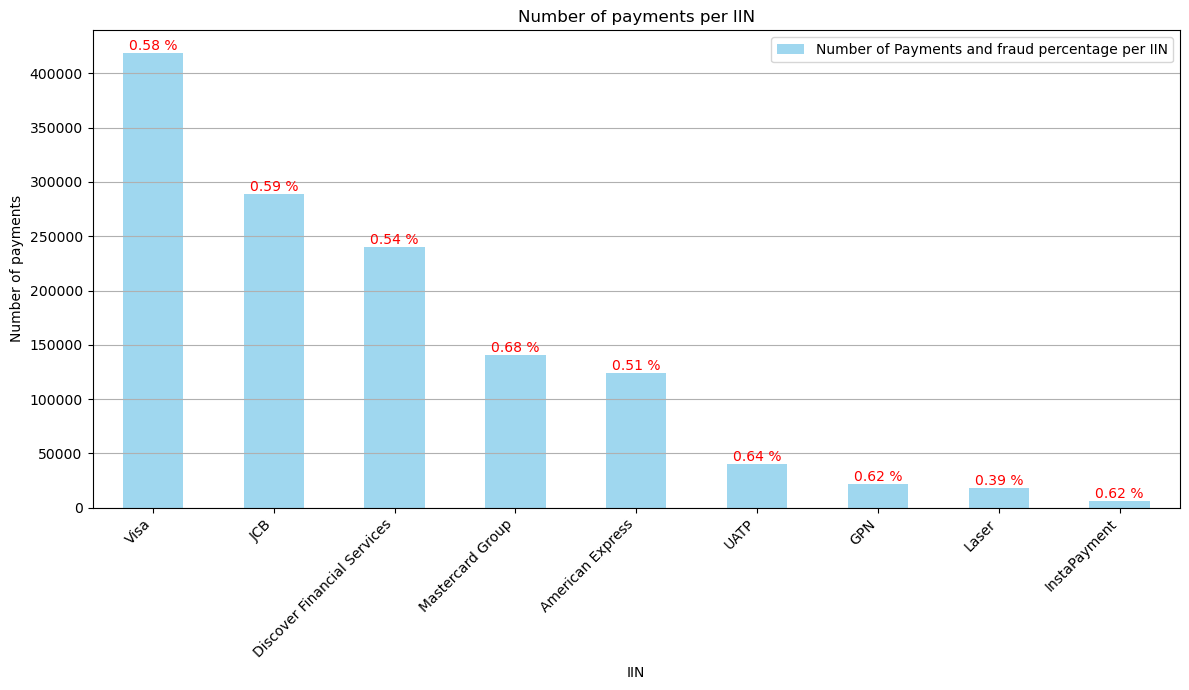

In [20]:
# Crée une fonction pour mapper les groupes
def map_iin_group(iin):
    if iin in ['Discover Card', 'Diners Club Intl', 'Diners Club USA & Canada']:
        return 'Discover Financial Services'
    elif iin in ['Mastercard', 'Maestro', 'Maestro UK', 'Switch']:
        return 'Mastercard Group'
    else:
        return iin

# Appliquer la fonction à une nouvelle colonne
df['iin_group'] = df['iin'].apply(map_iin_group)

iin_sum = df.groupby('iin_group').size().sort_values(ascending=False)



# Calculer les paiements frauduleux par liste d'émetteur
fraud_iin_sum = df[df['is_fraud'] == 1].groupby('iin_group').size()
fraud_iin_percentage = (fraud_iin_sum / iin_sum) * 100

# Calculer le paiement moyen par catégorie
avg_payment_per_iin = df.groupby('iin_group')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_category,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé des paiements par catégorie
iin_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)


# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, iin_group in enumerate(iin_sum.index):
    ax1.text(i, iin_sum[iin_group], f'{fraud_iin_percentage[iin_group]:.2f} %', 
             ha='center', va='bottom', color='red', fontsize=10)
    
# Configuration du graphique
plt.xlabel('IIN')
plt.ylabel('Number of payments')
plt.title('Number of payments per IIN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and fraud percentage per IIN'], loc='upper right')


plt.tight_layout()
plt.show()



In [21]:
fraud_amt_sum = df[df['is_fraud'] == 1]['amt'].sum()
print(f"La somme des montants frauduleux est : {fraud_amt_sum}\n")

fraud_amt_sum = df[df['is_fraud'] == 0]['amt'].sum()
print(f"La somme des montants non frauduleux est : {fraud_amt_sum}")


La somme des montants frauduleux est : 3988088.6100000003

La somme des montants non frauduleux est : 87234340.28999999


In [22]:
# Affichage de is_fraud en fonction d'un critère horaire
isfraud_time = df.groupby(['dayname', 'is_fraud']).size().unstack(fill_value=0)
isfraud_only = isfraud_time[1]
print(isfraud_only,"\n")

isfraud_time = df.groupby(['hour', 'is_fraud']).size().unstack(fill_value=0)
isfraud_only = isfraud_time[1]
print(isfraud_only,"\n")


dayname
Friday       1079
Monday       1182
Saturday     1227
Sunday       1216
Thursday     1008
Tuesday       935
Wednesday     859
Name: 1, dtype: int64 

hour
0      635
1      658
2      625
3      609
4       46
5       60
6       40
7       56
8       49
9       47
10      40
11      42
12      67
13      80
14      86
15      79
16      76
17      78
18      81
19      81
20      62
21      74
22    1931
23    1904
Name: 1, dtype: int64 



In [23]:
#  Calculer le nombre d'occurrences de is_fraud, groupé par hour et is_fraud
isfraud_time = df.groupby(['hour', 'is_fraud']).size().unstack(fill_value=0)
# Extraire uniquement les valeurs pour is_fraud = 1
isfraud_only = isfraud_time[1]
print(isfraud_only,"\n")


#On applique un filtre horaire, pour filter les heures ou il y a plus de 500 fraudes
isfraud_only_filtered = isfraud_only[isfraud_only >= 1000]
print(isfraud_only_filtered,"\n")

# stocke les variables dans une liste
hours_of_interest = isfraud_only_filtered.index.tolist()

print(hours_of_interest)

hour
0      635
1      658
2      625
3      609
4       46
5       60
6       40
7       56
8       49
9       47
10      40
11      42
12      67
13      80
14      86
15      79
16      76
17      78
18      81
19      81
20      62
21      74
22    1931
23    1904
Name: 1, dtype: int64 

hour
22    1931
23    1904
Name: 1, dtype: int64 

[22, 23]


In [24]:
#  Calculer le nombre d'occurrences de is_fraud, groupé par dayname et is_fraud
isfraud_time = df.groupby(['dayname', 'is_fraud']).size().unstack(fill_value=0)
# Extraire uniquement les valeurs pour is_fraud = 1
isfraud_only = isfraud_time[1]
print(isfraud_only,"\n")


# Filtrer les données où 'is_fraud' est supérieur ou égal à 1000
isfraud_only_filtered = isfraud_only[isfraud_only >= 1000]

print(isfraud_only_filtered, "\n")


# stocke les variables dans une liste
day_of_interest = isfraud_only_filtered.index.tolist()

print(day_of_interest)

dayname
Friday       1079
Monday       1182
Saturday     1227
Sunday       1216
Thursday     1008
Tuesday       935
Wednesday     859
Name: 1, dtype: int64 

dayname
Friday      1079
Monday      1182
Saturday    1227
Sunday      1216
Thursday    1008
Name: 1, dtype: int64 

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday']


In [25]:
# Filtrer les données pour les heures et jours spécifiques
filtered_df = df[df['hour'].isin(hours_of_interest) & df['dayname'].isin(day_of_interest)]

                 
# Calculer le nombre d'occurrences de is_fraud, groupé par dayname et is_fraud
isfraud_time = filtered_df.groupby(['dayname', 'is_fraud']).size().unstack(fill_value=0)

# Extraire uniquement les valeurs pour is_fraud = 1
isfraud_only = isfraud_time[1]
print(isfraud_only, "\n")

dayname
Friday      560
Monday      615
Saturday    643
Sunday      603
Thursday    507
Name: 1, dtype: int64 



In [26]:
# Calcul des transactions totales par état sur la plage d'horaire filtrée
total_state = filtered_df.groupby('state').size()

# Calcul des transactions frauduleuses par état
fraud_state = filtered_df[filtered_df['is_fraud'] == 1].groupby('state').size()

# Calcul du pourcentage de fraude pour chaque état
fraud_percentage = (fraud_state / total_state) * 100

# Créer un DataFrame avec les résultats
fraud_summary_df = pd.DataFrame({
    'total_transactions': total_state,
    'fraud_transactions': fraud_state,
    'fraud_percentage': fraud_percentage
})

#on filtre les résultats
fraud_summary_df = fraud_summary_df[(fraud_summary_df['fraud_percentage'] >= 2.3) & (fraud_summary_df['fraud_transactions'] >= 100)]

# Remplir les valeurs manquantes (NaN) par 0 pour les états sans fraude et tri par ordre décroissant
fraud_summary_df = fraud_summary_df.fillna(0).sort_values(by=['fraud_transactions','fraud_percentage'], ascending=False)

# Afficher le résultat
print(fraud_summary_df)

# stocke les variables dans une liste
state_of_interest = fraud_summary_df.index.tolist()
print(state_of_interest)

       total_transactions  fraud_transactions  fraud_percentage
state                                                          
NY                   6671                 207              3.10
TX                   7854                 187              2.38
PA                   6541                 182              2.78
OH                   3554                 144              4.05
IL                   3404                 111              3.26
CA                   4339                 111              2.56
['NY', 'TX', 'PA', 'OH', 'IL', 'CA']


In [ ]:
df['full_name'] = df['first'] + ' ' + df['last']

# Filtrer le DataFrame en fonction des critères
filtered_df = df[(df['dayname'].isin(day_of_interest)) & 
                 (df['hour'].isin(hours_of_interest)) & 
                 (df['state'].isin(state_of_interest)) & 
                 (df['is_fraud'] == 1)]  

# CALCULER POURCENTAGE FILTERED DF VS POURCENTAGE TOTAL 


#  Calculer le nombre de fraudeurs
fraud_name = filtered_df.groupby('full_name')['is_fraud'].sum().sort_values(ascending=False)

# On filtre le nombre de fraudeurs 
fraud_name = fraud_name[fraud_name > 10]

# Filtrer le DataFrame avec le nom des fraudeurs
filtered_fraud_df = filtered_df[filtered_df['full_name'].isin(fraud_name.index)]

# Afficher le state, amt et trans_date_trans_time des fraudeurs
fraud_details = filtered_fraud_df[['full_name', 'state', 'amt', 'trans_date_trans_time']].sort_values(by= 'full_name')

display(fraud_details)


,full_name,state,amt,trans_date_trans_time
890496,Denise Barnett,OH,997.29,2019-12-23 23:50:32
890373,Denise Barnett,OH,751.78,2019-12-23 23:28:47
890335,Denise Barnett,OH,772.44,2019-12-23 23:19:38
890240,Denise Barnett,OH,864.17,2019-12-23 23:02:38
890226,Denise Barnett,OH,1023.02,2019-12-23 22:59:35
890083,Denise Barnett,OH,319.76,2019-12-23 22:30:04
884593,Denise Barnett,OH,51.50,2019-12-22 23:56:10
884569,Denise Barnett,OH,589.11,2019-12-22 23:50:34
884565,Denise Barnett,OH,302.26,2019-12-22 23:50:19
884464,Denise Barnett,OH,339.79,2019-12-22 23:32:26


In [28]:
fraud_amt_sum = df[df['is_fraud'] == 1]['amt'].sum()
print(f"La somme des montants frauduleux est : {fraud_amt_sum:.2f}\n")

fraud_amt_sum = df[df['is_fraud'] == 0]['amt'].sum()
print(f"La somme des montants non frauduleux est : {fraud_amt_sum:.2f}")


La somme des montants frauduleux est : 3988088.61

La somme des montants non frauduleux est : 87234340.29


In [29]:
# Les 50 plus grandes fraudes
result = df[df['is_fraud'] == 1].nlargest(50, ['amt'])
# result

In [30]:
# Les 50 plus grandes amt
result = df.nlargest(50, ['amt'])
# result

In [31]:
# Transactions frauduleuses en fonction du genre


# Affichage de is_fraud en fonction du genre

# isfraud_gender = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)
# isfraud_only = isfraud_gender[1]
# print(isfraud_only,"\n")


# Filtrer les transactions frauduleuses
fraud_df = df[df['is_fraud'] == 1]

isfraud_gender = fraud_df['gender'].value_counts()
isfraud_day_gender = fraud_df.groupby(['year', 'gender']).size().unstack(fill_value=0)
print(isfraud_day_gender,"\n")


isfraud_gender = fraud_df['gender'].value_counts()
isfraud_day_gender = fraud_df.groupby(['month', 'gender']).size().unstack(fill_value=0)
print(isfraud_day_gender,"\n")

isfraud_gender = fraud_df['gender'].value_counts()
isfraud_day_gender = fraud_df.groupby(['dayname', 'gender']).size().unstack(fill_value=0)
print(isfraud_day_gender,"\n")

isfraud_gender = fraud_df['gender'].value_counts()
isfraud_day_gender = fraud_df.groupby(['hour', 'gender']).size().unstack(fill_value=0)
print(isfraud_day_gender,"\n")



gender     F     M
year              
2019    2556  2664
2020    1179  1107 

gender    F    M
month           
1       448  401
2       458  395
3       539  399
4       285  393
5       447  488
6       413  275
7       172  159
8       160  222
9       175  243
10      203  251
11      136  252
12      299  293 

gender       F    M
dayname            
Friday     520  559
Monday     606  576
Saturday   586  641
Sunday     651  565
Thursday   470  538
Tuesday    494  441
Wednesday  408  451 

gender    F     M
hour             
0       349   286
1       365   293
2       352   273
3       322   287
4        23    23
5        30    30
6        18    22
7        33    23
8        25    24
9        17    30
10       24    16
11       24    18
12       36    31
13       37    43
14       37    49
15       40    39
16       40    36
17       43    35
18       37    44
19       34    47
20       26    36
21       34    40
22      888  1043
23      901  1003 

